In [2]:
import pandas
import numpy
import matplotlib
import scipy
import scipy.stats

%matplotlib inline

# ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

### выбираем экспоненциальное распределение. параметр выбираем равным единице (lambda = 1)



Определение и характеристики экспоненциального распределения можно найти вот здесь https://ru.wikipedia.org/wiki/Экспоненциальное_распределение

Теперь сделаем выборку x для построение плотности экспоненциального распределения

In [3]:
x = numpy.linspace(scipy.stats.expon.ppf(0.01), scipy.stats.expon.ppf(0.99), 1000)

### строим гистограмму по 1000 значениям выборки и график плотности функции

(array([ 0.63478224,  0.23101253,  0.09240501,  0.02711886,  0.01305723,
         0.0020088 ,  0.00301321,  0.        ,  0.        ,  0.0010044 ]),
 array([  2.16415032e-03,   9.97781161e-01,   1.99339817e+00,
          2.98901518e+00,   3.98463219e+00,   4.98024920e+00,
          5.97586621e+00,   6.97148322e+00,   7.96710023e+00,
          8.96271724e+00,   9.95833425e+00]),
 <a list of 1 Patch objects>)

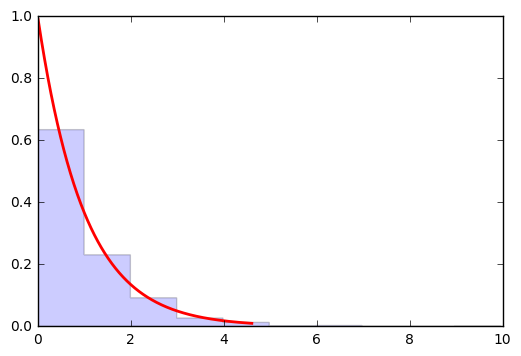

In [4]:
matplotlib.pyplot.plot(x, scipy.stats.expon.pdf(x), 'r-', lw=2, alpha=1, label='expon pdf')
matplotlib.pyplot.hist(scipy.stats.expon.rvs(size=1000), normed=True, histtype='stepfilled', alpha=0.2)

Теперь проверим центральную теорему на графика. Опишем несколько функций

### Определяем функцию генерации выборочных средних

In [5]:
expon = scipy.stats.expon();

def getMeans(n, count):
    result = [];
    for index in range(0, count):
        sample = expon.rvs(n);
        mean = numpy.mean(sample);
        result.append(mean);
    return numpy.array(result);

Тут мы просто в цикле по количеству выборочных средних получаем выборку числа n и высчитываем математическое ожидание, таким образом получаем выборочное среднее

### Рассмотрим математическое ожидание и дисперсию нашего исходного распределения

$$ \mu = \frac{1}{\lambda}  $$
$$ \sigma^2 = \frac{1}{\lambda^2} $$


### тогда для использования центральной придельной теоремы мы имеем параметры 

$$ \mu = \frac{1}{\lambda}  $$
$$ \sigma^2 = \frac{1}{n\lambda^2} $$


рассмотрим функцию отрисовки графика плотности нормально распределения.
почему мы берем numpy.sqrt() от дисперсии, потому что так работает scipy framework - scale равно не дисперсии а стандартному  отклонению https://en.wikipedia.org/wiki/Standard_deviation

In [103]:
def plotNormal(n, x1, x2):
    mu = 1.0;
    sigma = numpy.sqrt(1.0 / n);
    norm_rv = scipy.stats.norm(loc=mu, scale=sigma)
    x = numpy.linspace(x1, x2, 1000)
    pdf = norm_rv.pdf(x)
    matplotlib.pyplot.plot(x, pdf)



следующая функция производит необходимые нам вещи, все сразу - вычисляет выборочные средние, строит гистограмму и рисует функцию плотности нормально распределения с соответсвующими параметрами по центральной предельной теореме для нашего исходного распределения

In [130]:
def plotHistogram(n, count, x1, x2, bins):
    sample = getMeans(n, count);
    matplotlib.pyplot.hist(sample, bins, normed=True)
    matplotlib.pyplot.ylabel('number of samples')
    matplotlib.pyplot.xlabel('$x$')
    
    plotNormal(n, x1, x2)

### строим гистограмму для n=3, на промежутке от 0 до 5

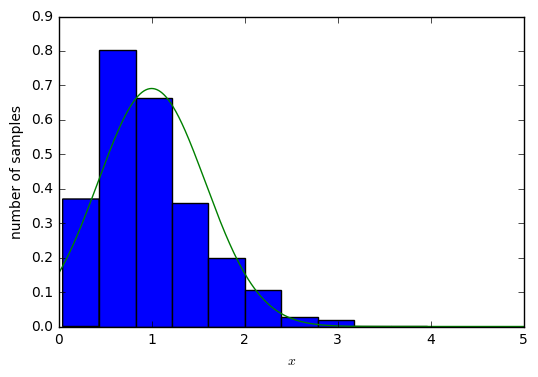

In [131]:
plotHistogram(3, 1000, 0, 5, 10)



### строим гистограмму для n=5, на промежутке от 0 до 5

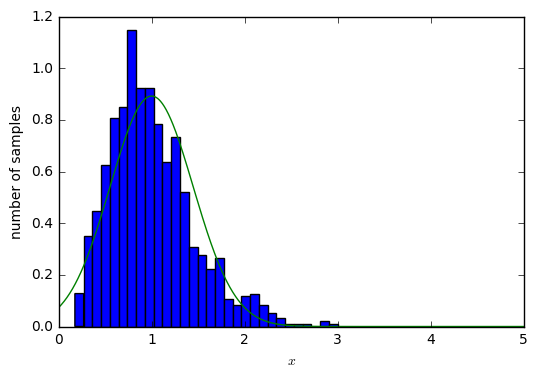

In [171]:
plotHistogram(5, 1000, 0, 5, 30)


### строим гистограмму для n=10, на промежутке от 0 до 2.5

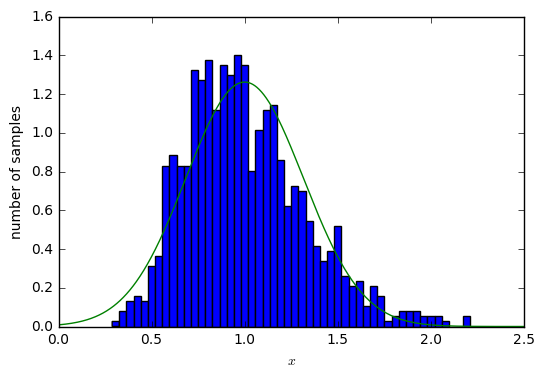

In [138]:
plotHistogram(10, 1000, 0, 2.5, 50)

### строим гистограмму для n = 50, на промежутке от 0.5 до 1.5

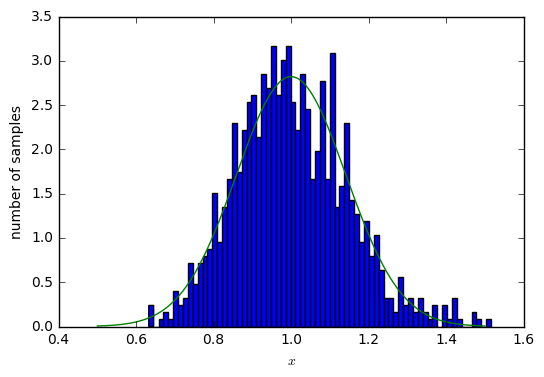

In [172]:
plotHistogram(50, 1000, 0.5, 1.5, 70)

### строим гистограмму для n = 100, количество выборок увеличили до 2000, на промежутке от 0.5 до 1.5

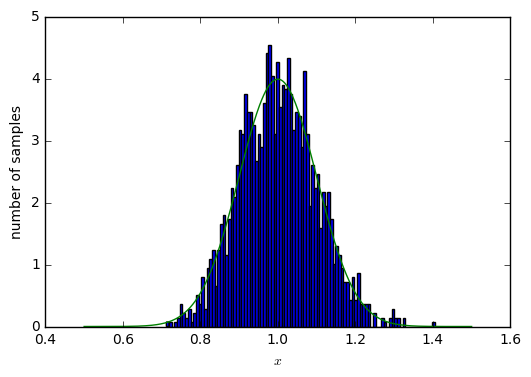

In [179]:
plotHistogram(100, 2000, 0.5, 1.5, 100)

### строим гистограмму для n = 1000, количество выборок увеличили до 20000, на промежутке от 0.9 до 1.1


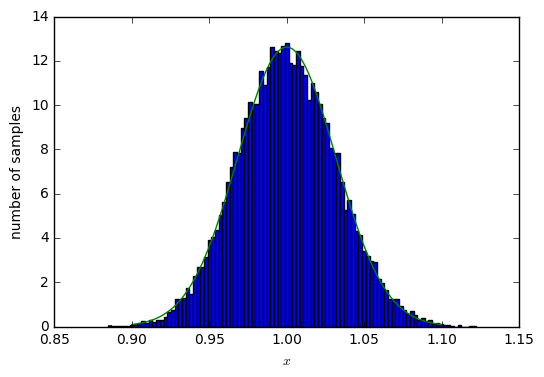

In [178]:
plotHistogram(1000, 20000, 0.90, 1.1, 100)

Попробуем посмотреть на сходимость при больших параметрах и на то похожа ли гистограмма на график плотности нормального распределения.

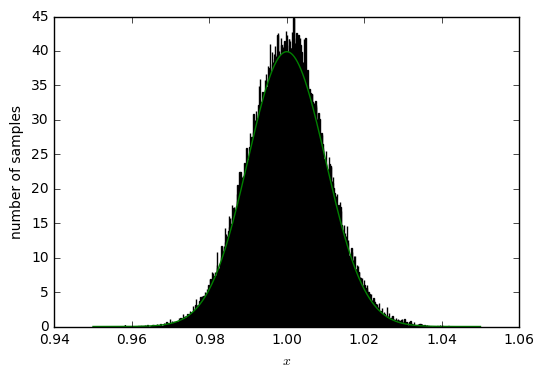

In [162]:
plotHistogram(10000, 100000, 0.95, 1.05, 1000)


# Исходя из из графиков можно сделать выводы

1) Центральная предельная теорема работает

2) Чем больше размер выборки и чем больше выборок, тем точнее распределение их средних значений аппроксимируется нормальным распределением